# A/B-тест гипотезы по увеличению выручки крупного интернет-магазина

Цель: выбрать гипотезу с наибольшим потцениалом для увеличения выручки интрнет-магазина, после чего провести А/Б тестирование и проанализировать результаты.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Приоритизация-гипотез" data-toc-modified-id="Приоритизация-гипотез-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Приоритизация гипотез</a></span></li><li><span><a href="#Проверка-корректности-данных-A/B-теста" data-toc-modified-id="Проверка-корректности-данных-A/B-теста-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка корректности данных A/B-теста</a></span></li><li><span><a href="#Построение-графиков-по-результатам-A/B-теста" data-toc-modified-id="Построение-графиков-по-результатам-A/B-теста-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Построение графиков по результатам A/B теста</a></span></li><li><span><a href="#Исследование-данных.-Поиск-аномальных-значений" data-toc-modified-id="Исследование-данных.-Поиск-аномальных-значений-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Исследование данных. Поиск аномальных значений</a></span></li><li><span><a href="#Статистическая-значимость-результатов-A/B-теста-без-фильтра-выбросов." data-toc-modified-id="Статистическая-значимость-результатов-A/B-теста-без-фильтра-выбросов.-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Статистическая значимость результатов A/B теста без фильтра выбросов.</a></span></li><li><span><a href="#Построение-графиков-по-данным-без-аномальных-значений" data-toc-modified-id="Построение-графиков-по-данным-без-аномальных-значений-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Построение графиков по данным без аномальных значений</a></span></li><li><span><a href="#Статистическая-значимость-результатов-A/B-теста-после-фильтра-выбросов" data-toc-modified-id="Статистическая-значимость-результатов-A/B-теста-после-фильтра-выбросов-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Статистическая значимость результатов A/B теста после фильтра выбросов</a></span></li><li><span><a href="#Выводы-и-рекомендации" data-toc-modified-id="Выводы-и-рекомендации-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Выводы и рекомендации</a></span></li></ul></div>

## Описание проекта

Будучи аналитиком крупного интернет-магазина вместе с отделом маркетинга подготовили список гипотез для увеличения выручки. Необходимо выбрать наиболее значимую и проанализировать ее эффективность с помощью A/B теста.

## Описание данных

Таблица **hypothesis** \
`Hypothesis` — краткое описание гипотезы; \
`Reach` — охват пользователей по 10-балльной шкале;\
`Impact` — влияние на пользователей по 10-балльной шкале;\
`Confidence` — уверенность в гипотезе по 10-балльной шкале;\
`Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.\

Таблица **orders** \
`transacti onId` — идентификатор заказа;\
`visitorId` — идентификатор пользователя, совершившего заказ;\
`date` — дата, когда был совершён заказ;\
`revenue` — выручка заказа;\
`group` — группа A/B-теста, в которую попал заказ.\

Таблица **visitors** \
`date` — дата;\
`group` — группа A/B-теста;\
`visitors` — количество пользователей в указанную дату в указанной группе A/B-теста\


## Приоритизация гипотез


In [138]:
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
import matplotlib.ticker as ticker

In [139]:
try:
    hypothesis = pd.read_csv('D:\Jypiter\datasets\AB-test_online_store\hypothesis.csv')
except:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [140]:
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis.head(10)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [141]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Пропусков нет, типа данных соответсвуют значениям. Можно работать с таблицей.

In [142]:
hypothesis['ICE'] = round(hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts'], 1)
pd.set_option('display.max_colwidth', 0)
hypothesis.sort_values(by='ICE', ascending=False).head(10)

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0


In [143]:
hypothesis['RICE'] = round(hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts'], 1)
hypothesis.sort_values(by='RICE', ascending=False).head(10)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0,3.0


<div style="border:solid Green 2px; padding: 20px">
    
Видно, что при применений разных методов приоритизации, в верхней части списка оказались разные гипотезы.
- для ICE: 8, 0, 7
- для RICE: 7, 2, 0

Произошло это по причине того, что **RICE** учитывает охват (`RICE = reach * ICE`).

Поскольку ключевая метрика, роста которой мы хотим добиться, это **выручка**, которая зависит от охвата, то ориентироваться лучше на показатель **RICE**.

Таким образом наиболее приоритетной гипотезой к проверке является №7: Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

## Проверка корректности данных A/B-теста

In [144]:
try:
    orders = pd.read_csv('D:\Jypiter\datasets\AB-test_online_store\orders.csv')
    visitors = pd.read_csv('D:\Jypiter\datasets\AB-test_online_store\\visitors.csv')    
except:
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')

In [145]:
orders.head(10)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [146]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [147]:
visitors.head(10)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [148]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [149]:
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [150]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [151]:
print('Количество пропусков в таблице "orders":', orders.duplicated().sum())
print('Количество пропусков в таблице "visitors":', visitors.duplicated().sum())

Количество пропусков в таблице "orders": 0
Количество пропусков в таблице "visitors": 0


<div style="border:solid Green 2px; padding: 20px">
Пропусков и дубликатов нет, типы данных соответсвуют значениям. Можно работать с таблицей.

<div style="border:solid Green 2px; padding: 20px">
Проверим корректность проведеного A/B тестирования.
Из доступного можем оценить:
- отсутствие пользователей, принадлежащих обеим группам;
- равномерность количества пользователей в группах;
- размер выборки для достоверной регистрации ожидаемого эффекта.

In [152]:
#Сгруппируем по visitorId. Агрегируем кол-во уникальных значений.
users_grouped = orders.groupby('visitorId').nunique().sort_values(by='group', ascending=False)

#Пользователей с двумя уникальными группами считаем задвоившимися
doubled_users = users_grouped[users_grouped['group'] >= 2].index

print('Длина таблицы "orders" до', len(orders))
print('Количество пользователей, попавших сразу в обе группы', len(doubled_users))

orders = orders.query('visitorId not in @doubled_users')
print('Длина таблицы "orders" после', len(orders))

Длина таблицы "orders" до 1197
Количество пользователей, попавших сразу в обе группы 58
Длина таблицы "orders" после 1016


In [153]:
print('Пользователей в группе А:', visitors[visitors['group'] == 'A']['visitors'].sum())
print('Пользователей в группе В:', visitors[visitors['group'] == 'B']['visitors'].sum())

print('Относительное различие количества пользователей в группах', "{0:.2%}"
      .format(
          round(
              visitors[visitors['group'] == 'B']['visitors'].sum()
              / visitors[visitors['group'] == 'A']['visitors'].sum() - 1,
              4)
      )
     )

Пользователей в группе А: 18736
Пользователей в группе В: 18916
Относительное различие количества пользователей в группах 0.96%


<div style="border:solid Green 2px; padding: 20px">
Онлайн-калькулятор показал, что достаточное количество пользователей, необходимое для теста: 11000.
Значит имеющиеся 36+ тысяч более чем достаточно.

<div style="border:solid Green 2px; padding: 20px">
Вывод по разделу:
1. Исключили записи с пользователями, попавшими в обе группы, т.к. не ясно, какая именна версия продукта повлияла на принятые ими решения.
2. Выборки равномерны по группам. Различие <1%
3. Данных достаточно для анализа и оценки статистической значимости

## Построение графиков по результатам A/B теста

Построим график кумулятивной выручки по группам:

In [154]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

datesGroups = orders[['date', 'group']].drop_duplicates()

cumulativeRevenue = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeRevenueA = cumulativeRevenue[cumulativeRevenue['group'] == 'A']
cumulativeRevenueB = cumulativeRevenue[cumulativeRevenue['group'] == 'B']


mergedCumulativeRevenue = cumulativeRevenueA[['date', 'revenue']].merge(cumulativeRevenueB[['date', 'revenue']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])


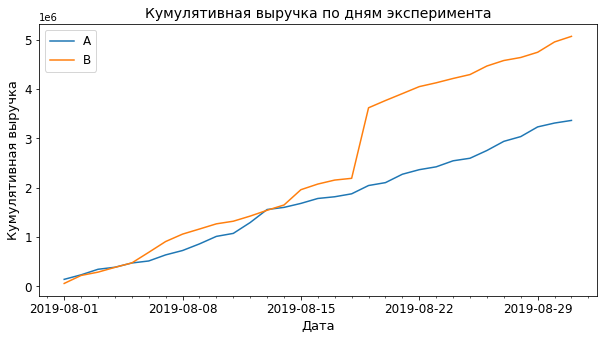

In [155]:
fig, ax = plt.subplots()

plt.plot(mergedCumulativeRevenue['date'], mergedCumulativeRevenue['revenueA'], label='A')
plt.plot(mergedCumulativeRevenue['date'], mergedCumulativeRevenue['revenueB'], label='B')

fig.set_size_inches(10, 5)
#  Устанавливаем интервал основных делений:
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))

#  Устанавливаем интервал вспомогательных делений:
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

plt.title('Кумулятивная выручка по дням эксперимента', fontsize=14) 
plt.xlabel('Дата', fontsize=13) 
plt.ylabel('Кумулятивная выручка', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(fontsize=12) 
plt.show()

<div style="border:solid Green 2px; padding: 20px">
Из графика видно, что группа "B" почти на всем промежутке времени приносила больше выручки, и к концу исследования обогнала группа "А" на ~50%. \
Однако стоит учесть, что 19.08.2019 был резкий скачок по выручке в группе "B", что может свидетельствовать о крупных заказах в этот день, являющимися скорее случайностью, чем следствием внедрения нововведения. Такие выбросы мы позже отбросим при анализе результатов.

<div style="border:solid Green 2px; padding: 20px">
Построим график кумулятивного среднего чека по группам:

In [156]:
cumulativeAverageBill = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'revenue': 'sum',
            'visitorId': 'count'
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeAverageBill.columns = ['date', 'group', 'revenue', 'buyers']

cumulativeAverageBill['avg_bill'] = cumulativeAverageBill['revenue'] / cumulativeAverageBill['buyers']

cumulativeAverageBillA = cumulativeAverageBill[cumulativeAverageBill['group'] == 'A']
cumulativeAverageBillB = cumulativeAverageBill[cumulativeAverageBill['group'] == 'B']

mergedCumulativeAverageBill = cumulativeAverageBillA[['date', 'avg_bill']].merge(cumulativeAverageBillB[['date', 'avg_bill']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

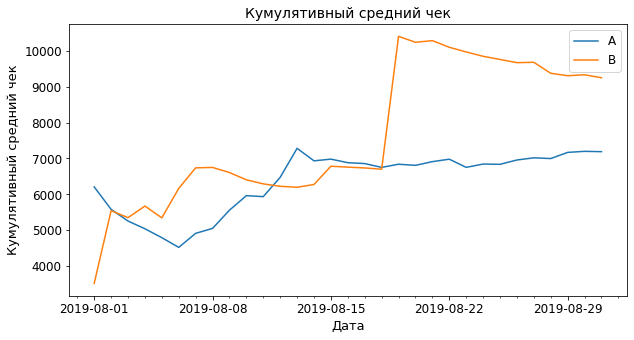

In [157]:
fig, ax = plt.subplots()

plt.plot(mergedCumulativeAverageBill['date'], mergedCumulativeAverageBill['avg_billA'], label='A')
plt.plot(mergedCumulativeAverageBill['date'], mergedCumulativeAverageBill['avg_billB'], label='B')

fig.set_size_inches(10, 5)
#  Устанавливаем интервал основных делений:
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))

#  Устанавливаем интервал вспомогательных делений:
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

plt.title('Кумулятивный средний чек', fontsize=14) 
plt.xlabel('Дата', fontsize=13) 
plt.ylabel('Кумулятивный средний чек', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(fontsize=12) 
plt.show()

<div style="border:solid Green 2px; padding: 20px">
Из графика видно, что по динамике среднего чека группы лидировали поочерёдно, но к концу исследования группа "B" обогнала группу "A" на ~30%. 
    
Здесь также видно, что 19.08.2019 был резкий скачок по среднему чеку в группе "B", что может свидетельствовать о крупных заказах в этот день, являющимися скорее случайностью, чем следствием внедрения нововведения. Такие выбросы мы позже отбросим при анализе результатов

<div style="border:solid Green 2px; padding: 20px">
Построим график относительного изменения кумулятивного среднего чека группы B к группе A:

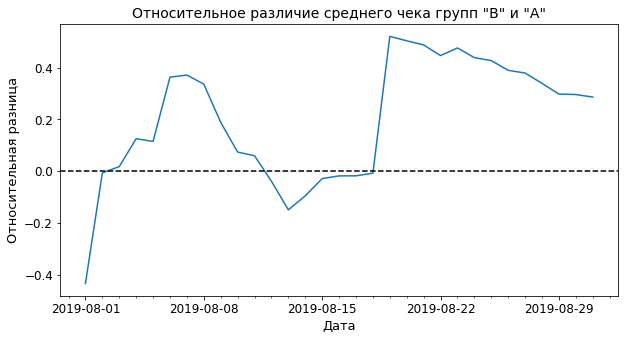

In [158]:
fig, ax = plt.subplots()

plt.plot(mergedCumulativeAverageBill['date'], mergedCumulativeAverageBill['avg_billB'] / mergedCumulativeAverageBill['avg_billA'] - 1)
plt.axhline(y=0, color='black', linestyle='--')

fig.set_size_inches(10, 5)
#  Устанавливаем интервал основных делений:
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))

#  Устанавливаем интервал вспомогательных делений:
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

plt.title('Относительное различие среднего чека групп "B" и "A"', fontsize=14) 
plt.xlabel('Дата', fontsize=13) 
plt.ylabel('Относительная разница', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

<div style="border:solid Green 2px; padding: 20px">
График относительного изменения кумулятивного среднего чека группы B к группе A показывает попеременное лидерство групп, и итоговую победу группа "B" на ~30%. \
Помимо всплеска 19.08.2019 в группе "B", здесь лучше видно, что, возможно в группе "А" был всплески 8 и 9 августа. Сможем определить так ли это на этапе отбора аномальных значений.

<div style="border:solid Green 2px; padding: 20px">
Построим график кумулятивного среднего количества заказов на посетителя по группам:

In [159]:
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'visitors',
]

cumulativeData['avg_purchases_per_visitor'] = (
    cumulativeData['orders'] / cumulativeData['visitors']
)

cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

mergedCumulativeAvgPurchases = cumulativeDataA[['date', 'avg_purchases_per_visitor']].merge(cumulativeDataB[['date', 'avg_purchases_per_visitor']], left_on='date', right_on='date', how='left', suffixes=['_A', '_B'])



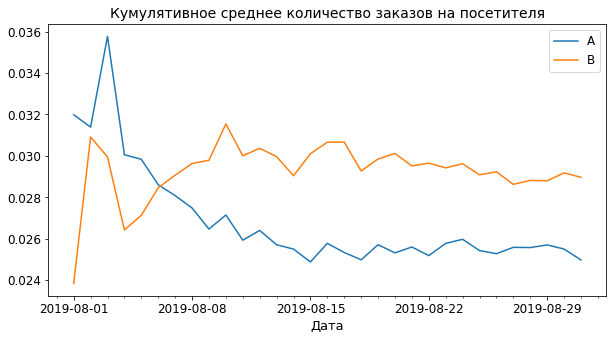

In [160]:
fig, ax = plt.subplots()

plt.plot(mergedCumulativeAvgPurchases['date'], mergedCumulativeAvgPurchases['avg_purchases_per_visitor_A'], label='A')
plt.plot(mergedCumulativeAvgPurchases['date'], mergedCumulativeAvgPurchases['avg_purchases_per_visitor_B'], label='B')

fig.set_size_inches(10, 5)
#  Устанавливаем интервал основных делений:
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))

#  Устанавливаем интервал вспомогательных делений:
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

plt.title('Кумулятивное среднее количество заказов на посетителя', fontsize=14) 
plt.xlabel('Дата', fontsize=13) 
plt.ylabel('', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(fontsize=12) 
plt.show()

<div style="border:solid Green 2px; padding: 20px">
Наблюдаем, что средние количества заказов на поситетеля на начальном этапе сильно колебались, но ближе к концу теста установились в близи значений:
- 0.029 для группы "A"
- 0.034 для группы "B"

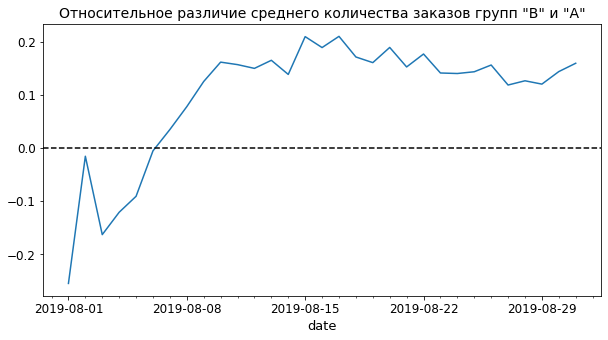

In [161]:
fig, ax = plt.subplots()

plt.plot(mergedCumulativeAvgPurchases['date'], mergedCumulativeAvgPurchases['avg_purchases_per_visitor_B'] / mergedCumulativeAvgPurchases['avg_purchases_per_visitor_A'] - 1)
plt.axhline(y=0, color='black', linestyle='--')

fig.set_size_inches(10, 5)
#  Устанавливаем интервал основных делений:
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))

#  Устанавливаем интервал вспомогательных делений:
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

plt.title('Относительное различие среднего количества заказов групп "B" и "A"', fontsize=14) 
plt.xlabel('date', fontsize=13) 
plt.ylabel('', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


<div style="border:solid Green 2px; padding: 20px">
    
Из графика также видно, что группа "B" имеет среднее количество заказов на посетителя на ~16% выше группы А.
Предварительно можно утверждать, что нововведение привело к увеличению данного показателя. Однако для достоверного заключения, необходимо будет провести подобный анализ, отбросим аномальные значения.

## Исследование данных. Поиск аномальных значений

<div style="border:solid Green 2px; padding: 20px">
Построим точечный график количества заказов по пользователям:

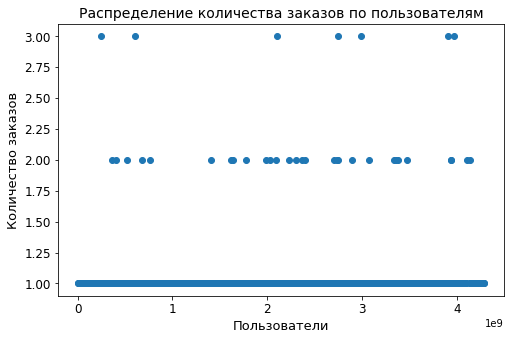

In [162]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']

x_values = pd.Series(range(0,len(orders['revenue'])))

plt.figure(figsize=(8, 5))
plt.scatter(ordersByUsers['userId'], ordersByUsers['orders'])

plt.title('Распределение количества заказов по пользователям', fontsize=14)
plt.xlabel('Пользователи', fontsize=13)
plt.ylabel('Количество заказов', fontsize=13)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<div style="border:solid Green 2px; padding: 20px">
Из точечного графика видим, что пользователи совершили от 1 до 3 заказов.
Большинство пользователей сделало 1-2 заказа период. 

*В исходном датафрейме есть пользователи, совершившие более 3 заказов, вплоть до 11. Однако, когда мы убирали задублировавшихся пользователей, все они исчезли из итогового датафрейма*



<div style="border:solid Green 2px; padding: 20px">
Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей:

In [163]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

<div style="border:solid Green 2px; padding: 20px">
Из этого следует, что:
 - 95% пользователей совершили не более 2 заказов за период;
 - 99% пользователей совершили не более 4 заказов за период.
 
 Примем 2 заказа за верхнюю границу. Пользователей с большим количество заказов за период отбросим.

<div style="border:solid Green 2px; padding: 20px">
Построим точечный график стоимостей заказов по пользователям:

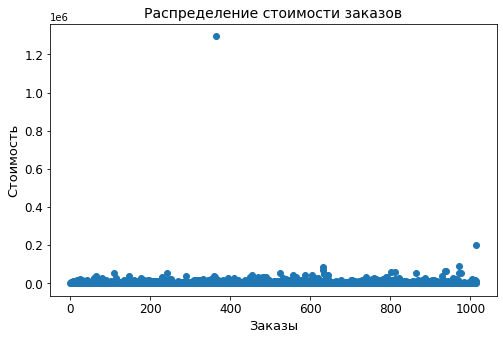

In [164]:
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.figure(figsize=(8, 5))
plt.scatter(x_values, orders['revenue'])

plt.xlabel('Заказы', fontsize=13)
plt.ylabel('Стоимость', fontsize=13)
plt.title('Распределение стоимости заказов', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<div style="border:solid Green 2px; padding: 20px">
Из точечного графика видим аномально крупный заказ на ~1.3 млн. Скорее всего это и есть тот заказ, обеспечивший скачок, который мы наблюдали ранее. Видим также заказ в районе 200 тысяч - еще один выброс

Данный масштаб позволяет явно различить только эти крупные выбросы. Зададим ограничения по оси Y для поиска других выбросов.

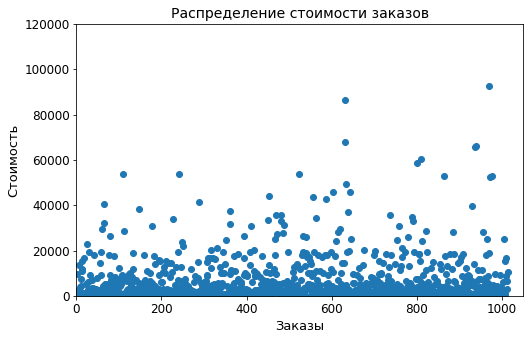

In [165]:
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.figure(figsize=(8, 5))
plt.scatter(x_values, orders['revenue'])
plt.axis([0, 1050, 0, 120000])

fig.set_size_inches(10, 5)
plt.title('Распределение стоимости заказов', fontsize=14)
plt.xlabel('Заказы', fontsize=13)
plt.ylabel('Стоимость', fontsize=13)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
plt.show()

<div style="border:solid Green 2px; padding: 20px">
Остальные данные расположены кучно. Отбросим лишнее после расчёта перцентилей.

In [166]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

<div style="border:solid Green 2px; padding: 20px">
Из этого следует, что:
 - 95% заказов за период не превышали 28 тыс.;
 - 99% заказов за период не превышали 58,2 тыс.
 
Примем за границу 28 тыс. Заказы с большей стоимостью будем считать выбросами

## Статистическая значимость результатов A/B теста без фильтра выбросов.

<div style="border:solid Green 2px; padding: 20px">
Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.
Для этого сформируем две выборки:
- по группе "А";
- по группе "B"

Включим в них также пользователей с нулевыми покупками

In [167]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

visitorsA = visitors[visitors['group'] == 'A']
visitorsB = visitors[visitors['group'] == 'B']

sample_avg_orders_A = pd.concat([ordersByUsersA['orders'],
                                 pd.Series(0, 
                                           index=np.arange(
                                               visitorsA['visitors'].sum() - len(ordersByUsersA['orders'])
                                           ), name='orders')
                                ], axis=0)
sample_avg_orders_B = pd.concat([ordersByUsersB['orders'],
                                 pd.Series(0, 
                                           index=np.arange(
                                               visitorsB['visitors'].sum() - len(ordersByUsersB['orders'])
                                           ), name='orders')
                                ],axis=0)

<div style="border:solid Green 2px; padding: 20px">
Посчитаем статистическую значимость различий среднего количества заказов на посетителя между группами по «сырым» данным:

<div style="border:solid Green 2px; padding: 20px">
Нулевая гипотеза <b>H0</b>: средние значения количества заказов на посетителя у групп "А" и "В" <b>равны</b>.<br>
Альтернативная гипотеза <b>H1</b>: средние значения количества заказов на посетителя  у групп "А" и "В" <b>различны</b>.<br>
Для проверки будет использован критерий Уилкоксона-Манна-Уитни.

In [168]:
alpha = 0.05

print('Среднее значение выборки А:', round(sample_avg_orders_A.mean(), 4))
print('Среднее значение выборки В:', round(sample_avg_orders_B.mean(), 4))

print('Относительное различие между средними значеними двух выборок:', "{0:.2%}"
      .format(sample_avg_orders_B.mean() / sample_avg_orders_A.mean() - 1)
     )
print('p-value:', "{0:.3f}".format(st.mannwhitneyu(sample_avg_orders_A, sample_avg_orders_B)[1]))
print()

if st.mannwhitneyu(sample_avg_orders_A, sample_avg_orders_B)[1] < alpha:
    print('Нулевая гипотеза отвергается. Средние значения выборок различны')
else:
    print('Нулевая гипотеза не отвергается. Средние значения выборок равны')


Среднее значение выборки А: 0.025
Среднее значение выборки В: 0.029
Относительное различие между средними значеними двух выборок: 15.98%
p-value: 0.011

Нулевая гипотеза отвергается. Средние значения выборок различны


<div style="border:solid Green 2px; padding: 20px">
По "сырым" данным в выборках среднего количества заказов есть различие. <br>
Приняли гипотезу H1, т.к. p-value < порогового значения достоверности (alpha=0.05). 

<div style="border:solid Green 2px; padding: 20px">
Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным:

<div style="border:solid Green 2px; padding: 20px"><br>
Нулевая гипотеза <b>H0</b>: средние значения чека  у групп "А" и "В"  <b>равны</b>. <br>
Альтернативная гипотеза <b>H1</b>: средние значения чека  у групп "А" и "В"  <b>различны</b>. <br>
Для проверки будет использован критерий Уилкоксона-Манна-Уитни.

In [169]:
alpha = 0.05

sample_avg_bill_A = orders[orders['group']=='A']['revenue']
sample_avg_bill_B = orders[orders['group']=='B']['revenue']

print('Относительное различие между средними значеними двух выборок:', '{:.2%}'
      .format(sample_avg_bill_B.mean() /
              sample_avg_bill_A.mean() -1)
     )
print('p-value:', '{0:.3f}'.format(st.mannwhitneyu(sample_avg_bill_A, sample_avg_bill_B)[1]))
print()

if st.mannwhitneyu(sample_avg_bill_A, sample_avg_bill_B)[1] < alpha:
    print('Нулевая гипотеза отвергается. Средние значения выборок различны')
else:
    print('Нулевая гипотеза не отвергается. Средние значения выборок равны')

Относительное различие между средними значеними двух выборок: 28.66%
p-value: 0.829

Нулевая гипотеза не отвергается. Средние значения выборок равны


<div style="border:solid Green 2px; padding: 20px">
По "сырым" данным метод Уилкоксона-Манна-Уитни показывает, что средние значения выборок равны.
    
Оставили гипотезу H0, т.к. p-value > порогового значения достоверности (alpha = 0.05). 

## Построение графиков по данным без аномальных значений

<div style="border:solid Green 2px; padding: 20px">
Рассчитаем статистическую значимость различий среднего количестве заказов на посетителя между группами по «очищенным» данным.

<div style="border:solid Green 2px; padding: 20px">
Для этого создадим срезы данных с аномальными значениями. Границы, выше которых значения будем считать аномальными:
- количество заказов на посетителя > 2;
- средний чек > 28000.

In [170]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

print('Количество пользователей с аномальным количеством заказов:', usersWithManyOrders.shape[0])
print('Количество заказов с аномальной стоимостью:', usersWithExpensiveOrders.shape[0])
print('Количество аномальных записей:', abnormalUsers.shape[0])

Количество пользователей с аномальным количеством заказов: 7
Количество заказов с аномальной стоимостью: 48
Количество аномальных записей: 55


<div style="border:solid Green 2px; padding: 20px">
Далее перестроим графики, используя "очищенные данные" для наблюдения реального эффекта без выбросов:

In [171]:
abnormalUsersList = abnormalUsers.values
orders = orders.query('visitorId not in @abnormalUsersList')

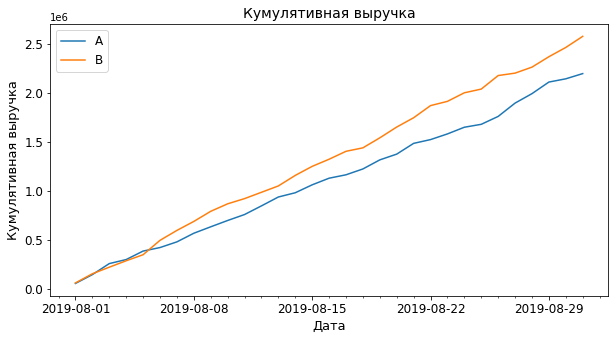

In [172]:
cumulativeRevenue = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeRevenueA = cumulativeRevenue[cumulativeRevenue['group'] == 'A']
cumulativeRevenueB = cumulativeRevenue[cumulativeRevenue['group'] == 'B']


mergedCumulativeRevenue = cumulativeRevenueA[['date', 'revenue']].merge(cumulativeRevenueB[['date', 'revenue']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

fig, ax = plt.subplots()

plt.plot(mergedCumulativeRevenue['date'], mergedCumulativeRevenue['revenueA'], label='A')
plt.plot(mergedCumulativeRevenue['date'], mergedCumulativeRevenue['revenueB'], label='B')

fig.set_size_inches(10, 5)
#  Устанавливаем интервал основных делений:
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))

#  Устанавливаем интервал вспомогательных делений:
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

plt.title('Кумулятивная выручка', fontsize=14) 
plt.xlabel('Дата', fontsize=13) 
plt.ylabel('Кумулятивная выручка', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(fontsize=12) 
plt.show()

<div style="border:solid Green 2px; padding: 20px">
 Выручка группы B стабильно выше выручки группы А, но теперь на ~15%, а не на ~50%, как было по исходным данным.

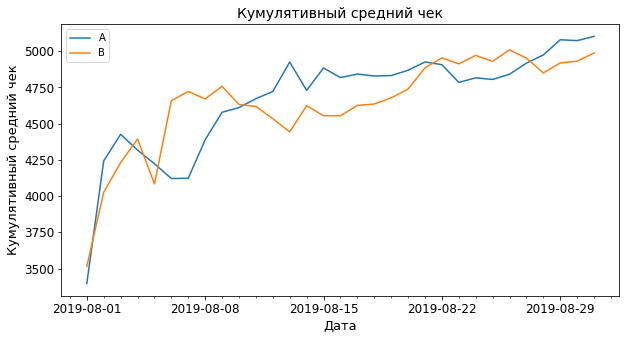

In [173]:
cumulativeAverageBill = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'revenue': 'sum',
            'visitorId': 'count'
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeAverageBill.columns = ['date', 'group', 'revenue', 'buyers']

cumulativeAverageBill['avg_bill'] = cumulativeAverageBill['revenue'] / cumulativeAverageBill['buyers']

cumulativeAverageBillA = cumulativeAverageBill[cumulativeAverageBill['group'] == 'A']
cumulativeAverageBillB = cumulativeAverageBill[cumulativeAverageBill['group'] == 'B']

mergedCumulativeAverageBill = cumulativeAverageBillA[['date', 'avg_bill']].merge(cumulativeAverageBillB[['date', 'avg_bill']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

fig, ax = plt.subplots()

plt.plot(mergedCumulativeAverageBill['date'], mergedCumulativeAverageBill['avg_billA'], label='A')
plt.plot(mergedCumulativeAverageBill['date'], mergedCumulativeAverageBill['avg_billB'], label='B')

fig.set_size_inches(10, 5)
#  Устанавливаем интервал основных делений:
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))

#  Устанавливаем интервал вспомогательных делений:
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

plt.title('Кумулятивный средний чек', fontsize=14) 
plt.xlabel('Дата', fontsize=13) 
plt.ylabel('Кумулятивный средний чек', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend() 
plt.show()

<div style="border:solid Green 2px; padding: 20px">
Средний чек группы "А" по "сырым данным" был на 30% выше. По "очищенным" на уровне с группой "B". 

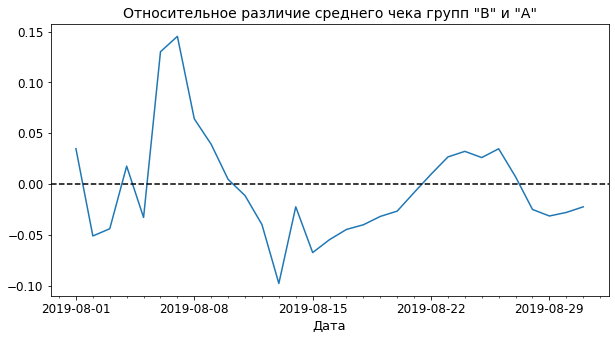

In [174]:
fig, ax = plt.subplots()

plt.plot(mergedCumulativeAverageBill['date'], mergedCumulativeAverageBill['avg_billB'] / mergedCumulativeAverageBill['avg_billA'] - 1)
plt.axhline(y=0, color='black', linestyle='--')

fig.set_size_inches(10, 5)
#  Устанавливаем интервал основных делений:
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))

#  Устанавливаем интервал вспомогательных делений:
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

plt.title('Относительное различие среднего чека групп "B" и "A"', fontsize=14) 
plt.xlabel('Дата', fontsize=13) 
plt.ylabel('', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

<div style="border:solid Green 2px; padding: 20px">
Средний чек с переменным успехов был то у группы А, то у группы B, но к концу исследования у группы B наблюдался результат в -3%.

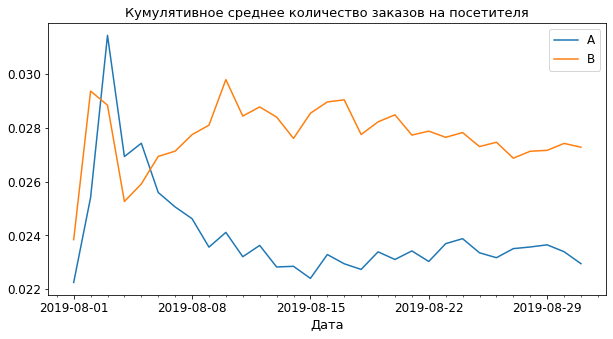

In [175]:
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'visitors',
]

cumulativeData['avg_purchases_per_visitor'] = (
    cumulativeData['orders'] / cumulativeData['visitors']
)

cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

mergedCumulativeAvgPurchases = cumulativeDataA[['date', 'avg_purchases_per_visitor']].merge(cumulativeDataB[['date', 'avg_purchases_per_visitor']], left_on='date', right_on='date', how='left', suffixes=['_A', '_B'])

fig, ax = plt.subplots()

plt.plot(mergedCumulativeAvgPurchases['date'], mergedCumulativeAvgPurchases['avg_purchases_per_visitor_A'], label='A')
plt.plot(mergedCumulativeAvgPurchases['date'], mergedCumulativeAvgPurchases['avg_purchases_per_visitor_B'], label='B')

fig.set_size_inches(10, 5)
#  Устанавливаем интервал основных делений:
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))

#  Устанавливаем интервал вспомогательных делений:
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

plt.title('Кумулятивное среднее количество заказов на посетителя', fontsize=13) 
plt.xlabel('Дата', fontsize=13) 
plt.ylabel('', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(fontsize=12) 
plt.show()

<div style="border:solid Green 2px; padding: 20px">
Среднее количество заказов на посетителя незначительно упало в обеих группах (~ -2%), т.к. были отброшены пользователи с большим количеством покупок за период исследования.
По этим данным группа B показала себя стабильно лучше, 0.0275 против 0.0230 покупок на пользователя.

In [1]:
fig, ax = plt.subplots()

plt.plot(mergedCumulativeAvgPurchases['date'], mergedCumulativeAvgPurchases['avg_purchases_per_visitor_B'] / mergedCumulativeAvgPurchases['avg_purchases_per_visitor_A'] - 1)
plt.axhline(y=0, color='black', linestyle='--')

fig.set_size_inches(10, 5)
#  Устанавливаем интервал основных делений:
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))

#  Устанавливаем интервал вспомогательных делений:
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

plt.title('Относительное различие среднего количества заказов на посетителя групп "B" и "A"', fontsize=14) 
plt.xlabel('Дата', fontsize=13) 
plt.ylabel('', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


SyntaxError: invalid syntax (1543679024.py, line 1)

## Статистическая значимость результатов A/B теста после фильтра выбросов

<div style="border:solid Green 2px; padding: 20px">
Посчитаем статистическую значимость различий среднего количества заказов на посетителя между группами по «очищенным» данным:

<div style="border:solid Green 2px; padding: 20px">
Нулевая гипотеза <b>H0</b>: средние значения количества заказов на посетителя  у групп "А" и "В" <b>равны</b>. <br>
Альтернативная гипотеза <b>H1</b>: средние значения количества заказов на посетителя  у групп "А" и "В" <b>различны</b>. <br>
Для проверки будет использован критерий Уилкоксона-Манна-Уитни.

In [177]:
sample_avg_orders_A_filtered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsA['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_avg_orders_B_filtered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsA['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

alpha = 0.05

print('Среднее значение выборки А:', round(sample_avg_orders_A_filtered.mean(), 4))
print('Среднее значение выборки В:', round(sample_avg_orders_B_filtered.mean(), 4))

print('Относительное различие между средними значеними двух выборок:', "{0:.2%}"
      .format(sample_avg_orders_B_filtered.mean() / sample_avg_orders_A_filtered.mean() - 1)
     )
print('p-value:', "{0:.3f}".format(st.mannwhitneyu(sample_avg_orders_A_filtered, sample_avg_orders_B_filtered)[1]))
print()

if st.mannwhitneyu(sample_avg_orders_A_filtered, sample_avg_orders_B_filtered)[1] < alpha:
    print('Нулевая гипотеза отвергается. Средние значения выборок различны')
else:
    print('Нулевая гипотеза не отвергается. Средние значения выборок равны')


Среднее значение выборки А: 0.023
Среднее значение выборки В: 0.0275
Относительное различие между средними значеними двух выборок: 19.48%
p-value: 0.007

Нулевая гипотеза отвергается. Средние значения выборок различны


<div style="border:solid Green 2px; padding: 20px">
По "очищенным" данным в выборках среднего количества заказов есть различие. <br>
Приняли гипотезу H1, т.к. p-value < порогового значения достоверности (alpha=0.05). 

<div style="border:solid Green 2px; padding: 20px">
Рассчитаем статистическую значимость различий в среднем чеке между группами по «очищенным» данным:

<div style="border:solid Green 2px; padding: 20px">
Нулевая гипотеза <b>H0</b>: средние значения чека  у групп "А" и "В"  <b>равны</b>. <br>
Альтернативная гипотеза <b>H1</b>: средние значения чека  у групп "А" и "В"  <b>различны</b>. <br>
Для проверки будет использован критерий Уилкоксона-Манна-Уитни.

In [178]:
alpha = 0.05

sample_avg_bill_A_filtered = orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue']

sample_avg_bill_B_filtered = orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue']

print('Относительное различие между средними значеними двух выборок:',
    "{0:.2%}".format(
        sample_avg_bill_B_filtered.mean()
        / sample_avg_bill_A_filtered.mean()
        - 1
    )
)

print('p-value:',
    '{0:.3f}'.format(
        st.mannwhitneyu(sample_avg_bill_A_filtered, sample_avg_bill_B_filtered)[1]
    )
)


if st.mannwhitneyu(sample_avg_bill_A_filtered, sample_avg_bill_B_filtered)[1] < alpha:
    print('Нулевая гипотеза отвергается. Средние значения выборок различны')
else:
    print('Нулевая гипотеза не отвергается. Средние значения выборок равны')

Относительное различие между средними значеними двух выборок: -2.24%
p-value: 0.762
Нулевая гипотеза не отвергается. Средние значения выборок равны


<div style="border:solid Green 2px; padding: 20px">
По "сырым" данным в выборках среднего чека нет статистической разницы. 
    
Оставили гипотезу H0, т.к. p-value > порогового значения достоверности (alpha = 0.05). 

<div style="border:solid Green 2px; padding: 20px">
Сведем в общую таблицу изменения значений кол-ва заказов на посетителя и среднего чека по исходным данным и данным без выбросов:

In [179]:
columns = ['data', 'metric', 'difference, %', 'p-value', 'stats_result']
data = [
    ["Исходные данные",
     'Средее кол-во заказов на пользователя',
     "{0:.2%}"
      .format(sample_avg_orders_B.mean() / sample_avg_orders_A.mean() - 1),
     st.mannwhitneyu(sample_avg_orders_A, sample_avg_orders_B)[1],
     'средние значения различны'],
    
    ["Исходные данные",
     'Средний чек',
     '{:.2%}'
      .format(sample_avg_bill_B.mean() /
              sample_avg_bill_A.mean() -1),
     st.mannwhitneyu(sample_avg_bill_A, sample_avg_bill_B)[1],
     'средние значения равны'],
    
    ["Данные без выбросов",
     'Средее кол-во заказов на пользователя',
     "{0:.2%}"
      .format(sample_avg_orders_B_filtered.mean() / sample_avg_orders_A_filtered.mean() - 1),
     st.mannwhitneyu(sample_avg_orders_A_filtered, sample_avg_orders_B_filtered)[1],
     'средние значения различны'],
    
    ["Данные без выбросов",
     'Средний чек',
     "{0:.2%}".format(
        sample_avg_bill_B_filtered.mean()
        / sample_avg_bill_A_filtered.mean()
        - 1
    ),
     st.mannwhitneyu(sample_avg_bill_A_filtered, sample_avg_bill_B_filtered)[1],
     'средние значения равны'],
]
results = pd.DataFrame(data=data, columns=columns)
results.head()

,data,metric,"difference, %",p-value,stats_result
0,Исходные данные,Средее кол-во заказов на пользователя,15.98%,0.011018,средние значения различны
1,Исходные данные,Средний чек,28.66%,0.829491,средние значения равны
2,Данные без выбросов,Средее кол-во заказов на пользователя,19.48%,0.007490,средние значения различны
3,Данные без выбросов,Средний чек,-2.24%,0.761688,средние значения равны


## Выводы и рекомендации

<div style="border:solid Green 2px; padding: 20px">
<b>Выводы</b>:

1. Для достижения ключевой цели по увеличению выручки гипотезы были отранжированы по методу RICE. Приоритетной гипотезой стала: "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"

2. A/B-тест был проведен корректно. Выборки равномерные, количество данных достаточное. Пользователи, попавшие в обе группы, были исключены на этапе анализа.

3. По "сырым данным" у группы B
- выручка выше на 50%;
- средний чек выше на 29%;
- кол-во заказов на посетителя выше на 16%, чем у группы А.

4. При анализе данных были обнаружены выбросы. Было решено отсечь пользователей с числом заказов за период более двух и стоимостью заказов более 28 тыс.

5. По "очищенным данным" у группы B:
- выручка выше на 16%;
- средний чек ниже на 2% (статистическая погрешность, p-value = 0.76);
- кол-во заказов на посетителя выше на 19%

6. Можно заключить, что увеличение целевой метрики, выручки, было достигнуто за счёт увеличения количества заказов на посетителя.
7. А/B тест можно считать успешным. Гипотеза прошла проверку и готова к полномасштабному внедрению.

<b>Рекомендации</b>:

1. Распространить нововведние, успешно прошедшее А/В тест на всех пользователей.
2. В дальнейшем при проведении A/B теста отладить процесс таким образом, чтобы пользователи не попадали в обе группы.
3. Запустить проверку следующей гипотезы для увелечения выручки.